<a href="https://colab.research.google.com/github/Sanjay05-coder/FB-Prophet-Airline-Passenger-Forecasting/blob/main/FB_Prophet_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Facebook Prophet?

Facebook Prophet (often just called Prophet) is an open-source forecasting tool developed by Facebook’s Core Data Science team. It is designed specifically for time series forecasting (predicting values over time, such as sales, stock prices, temperature, or website traffic).


Key Features
Beginner-Friendly
You don’t need deep knowledge of time series methods (like ARIMA or SARIMA). &* Prophet is intuitive and easy to use.
Handles Seasonality & Holidays
Daily, weekly, yearly seasonality is built-in.

You can add your own holidays or special events to improve forecasts.

Robust to Missing Data & Outliers
Works well even if your dataset has missing dates or irregular intervals.
Flexible Trend Modeling
Can model linear or logistic growth trends.

Detects and adapts to trend changepoints automatically.

Fast & Scalable :It can handle large datasets efficiently.

How It Works

Prophet decomposes time series into three main components:

Trend → Long-term increase or decrease.

Seasonality → Repeating patterns (e.g., higher sales on weekends).

Holidays/Events → Special one-off spikes/dips.

The final forecast is a combination of these components.



forecasting helps us predict future values based on past patterns.

Can use long short term memory (LSTM) OR FB Phrophet both same purpose but FB is easier

##Example 1

Importing library

In [ ]:
import prophet
from prophet import Prophet
import numpy as np
import pandas as pd

In [ ]:
df=pd.DataFrame({
    'ds':pd.date_range(start='2023-01-01',periods=100),
    'y':[x*0.5 +10 for x in range(100)]

})

In [ ]:
#creating and fiting the model
model=Prophet() #calling the model
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph40tli_3/1i0z8ago.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph40tli_3/zbmg7w2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69168', 'data', 'file=/tmp/tmph40tli_3/1i0z8ago.json', 'init=/tmp/tmph40tli_3/zbmg7w2a.json', 'output', 'file=/tmp/tmph40tli_3/prophet_modelmm7xkd2w/prophet_model-20250920034840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Make future predictions

In [ ]:
future=model.make_future_dataframe(periods=30)# forcast 30 days ahead

#How about forcasting in hours or mins ?
#By default FB prophet uses periods in days .

#If you want to predict in hours , you need to specify the hours in the parameters

#Example
#Predict in 10 hours
#future = model.make_future_dataframe(periods=10,freq = 'H')-> freq = "H"(H

#Predict in 10 minutes
#future = model.make_future_dataframe(periods=10,freq = 'min')-> freq = "min"(min means minutes)
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,10.000106,9.999822,10.000390,10.000106,10.000106,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,0.0,0.0,0.0,10.000087
1,2023-01-02,10.500037,10.499733,10.500314,10.500037,10.500037,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,0.0,0.0,0.0,10.500031
2,2023-01-03,10.999969,10.999692,11.000266,10.999969,10.999969,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.0,0.0,0.0,10.999977
3,2023-01-04,11.499900,11.499597,11.500227,11.499900,11.499900,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.0,0.0,0.0,11.499918
4,2023-01-05,11.999965,11.999646,12.000276,11.999965,11.999965,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.0,0.0,0.0,11.999976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2023-05-06,72.499947,72.498004,72.501966,72.498094,72.501858,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,0.0,0.0,0.0,72.499935
126,2023-05-07,72.999946,72.997940,73.001946,72.997923,73.001990,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,-0.000018,0.0,0.0,0.0,72.999928
127,2023-05-08,73.499945,73.497828,73.502107,73.497822,73.502126,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,0.0,0.0,0.0,73.499939
128,2023-05-09,73.999944,73.997717,74.002228,73.997747,74.002246,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.0,0.0,0.0,73.999952


Plot the forecast


In [ ]:
# plot using phrophet.plot method passing in forecast dataframe

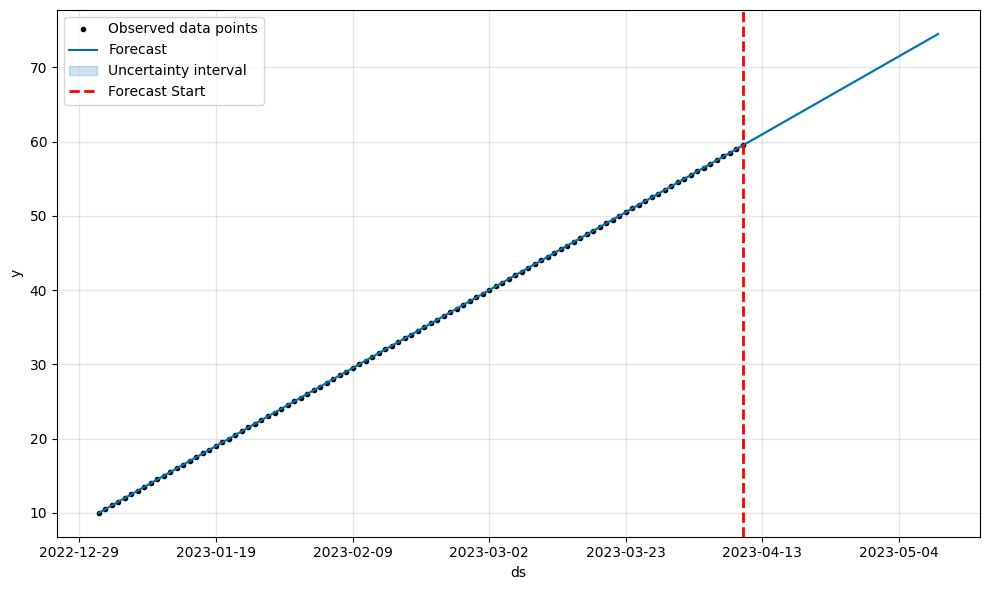

In [ ]:
import matplotlib.pyplot as plt

#plot with prophet
fig=model.plot(forecast)

# adding a vertical line at forecast start

train_end=df['ds'].max() # last date in training data


plt.axvline(x=train_end,color='red',linestyle='--',linewidth=2,label='Forecast Start')
plt.legend()
plt.show()


##Plot based on components
plots will return :
* yearly data
* weekly data
* first day of the month

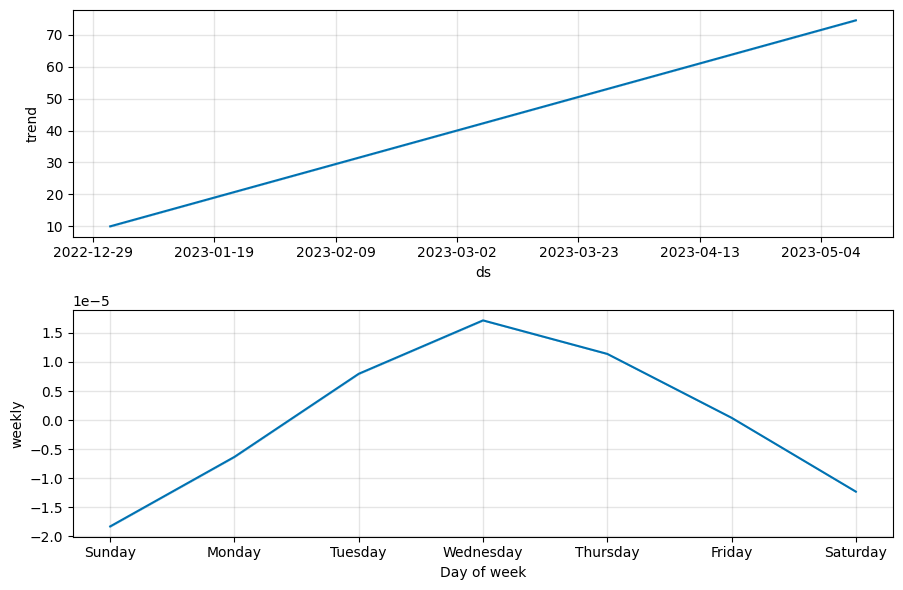

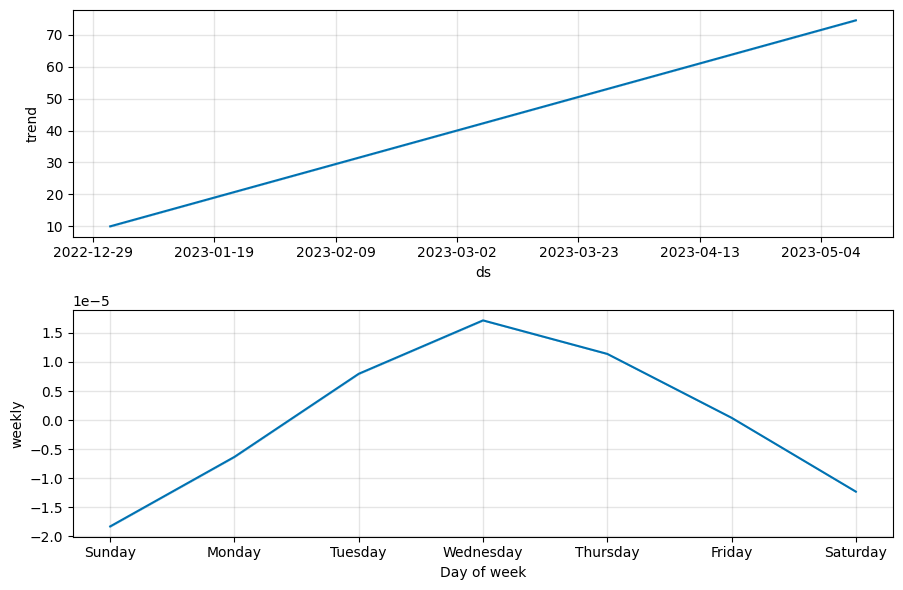

In [ ]:
fig_component=model.plot_components(forecast)

fig_component

## Ex 2: Predicting the Stock Data

using data directly frm yahoo finance


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
stock = "AAPL" #AAPL stock

#Download the last 60 days of hourly close prices

df = yf.download(stock, period = '60d',interval = '60m',auto_adjust="True",progress=False)
df= df[['Close']].copy()
df.tail()



Price,Close
Ticker,AAPL
Datetime,
2025-09-19 15:30:00+00:00,244.520004
2025-09-19 16:30:00+00:00,245.243805
2025-09-19 17:30:00+00:00,245.488495
2025-09-19 18:30:00+00:00,245.610001
2025-09-19 19:30:00+00:00,245.289993


In [ ]:
if df.index.tz is None:#Checks if there is any timezone on the data
  df.index = df.index.tz_localize("UTC")#If there is no timezone we assin our local timezone here

#Convert to MY timezone
df.index = df.index.tz_convert("Asia/Kuala_Lumpur")

# Ensure hourly frequency and fill missing
close = df['Close'].asfreq("H").ffill()
close.tail()

/tmp/ipython-input-3961891294.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  close = df['Close'].asfreq("H").ffill()


Ticker,AAPL
Datetime,
2025-09-19 23:30:00+08:00,244.520004
2025-09-20 00:30:00+08:00,245.243805
2025-09-20 01:30:00+08:00,245.488495
2025-09-20 02:30:00+08:00,245.610001
2025-09-20 03:30:00+08:00,245.289993


Based on LSTM consept we take the last value to predict the future



In [ ]:
last_value = close.iloc[-1]#Choose the last closed value

#Out time stops at 2025-09-20 03:30:00+08:00, so we need to create a futre time based on the prediction
future_index = pd.date_range(start=close.index[-1]+pd.Timedelta(hours=1),periods=48,freq='H')#Future time based on the forcast

forcast = pd.DataFrame({"forecast": [last_value]*48}, index=future_index)
forcast.head()

/tmp/ipython-input-2170782585.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(start=close.index[-1]+pd.Timedelta(hours=1),periods=48,freq='H')#Future time based on the forcast


,forecast
2025-09-20 04:30:00+08:00,Ticker AAPL 245.289993 Name: 2025-09-20 03:...
2025-09-20 05:30:00+08:00,Ticker AAPL 245.289993 Name: 2025-09-20 03:...
2025-09-20 06:30:00+08:00,Ticker AAPL 245.289993 Name: 2025-09-20 03:...
2025-09-20 07:30:00+08:00,Ticker AAPL 245.289993 Name: 2025-09-20 03:...
2025-09-20 08:30:00+08:00,Ticker AAPL 245.289993 Name: 2025-09-20 03:...


#Set the moving average to keep track


In [ ]:
ma_value = close.tail(24).mean()

forecast_ma = pd.DataFrame({"forecast": [ma_value]*48}, index=future_index)
forecast_ma.head()

,forecast
2025-09-20 04:30:00+08:00,Ticker AAPL 239.709683 dtype: float64
2025-09-20 05:30:00+08:00,Ticker AAPL 239.709683 dtype: float64
2025-09-20 06:30:00+08:00,Ticker AAPL 239.709683 dtype: float64
2025-09-20 07:30:00+08:00,Ticker AAPL 239.709683 dtype: float64
2025-09-20 08:30:00+08:00,Ticker AAPL 239.709683 dtype: float64


Plot the forecast


/tmp/ipython-input-4142533867.py:4: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  plt.plot(close.last("3D").index, close.last("3D").values, label="History")
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


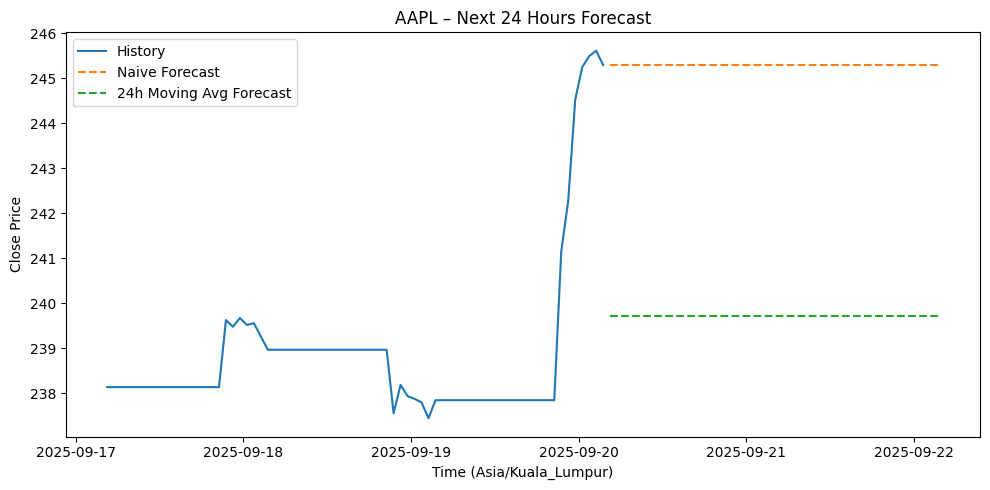

In [ ]:
plt.figure(figsize=(10,5))

# Plot last 3 days of history
plt.plot(close.last("3D").index, close.last("3D").values, label="History")

# Plot naive forecast
plt.plot(forcast.index, forcast["forecast"], label="Naive Forecast", linestyle="--")

# Plot moving average forecast
plt.plot(forecast_ma.index, forecast_ma["forecast"], label="24h Moving Avg Forecast", linestyle="--")

plt.title(f"{stock} – Next 24 Hours Forecast")
plt.xlabel("Time (Asia/Kuala_Lumpur)")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

##Conclusion
Facebook Prophet provides an effective and interpretable way to forecast airline passenger numbers, capturing both long-term trends and seasonal effects. The model’s forecasts can help airlines and analysts plan for future demand.